
**Pipeline_ColumnTransformer_HyperparameterTuning_MLModelSelection_ClassificationProblem**

**STRUCTURE**

*In this post, the automation of a machine learning workflow is demonstrated, by employing the scikit-learn Pipeline() , ColumnTransformer() and RandomizedSearchCV() methods. These methods are applied in a classification problem, where the goal is to select the classifier with the best train score and use it to make predictions on the test set ('Churn Modeling' dataset). 
 The classifiers used in this ML project are a) K-Nearest Neighbors (KNN), b) Support Vector Classifier (SVC) and c) Random Forest (RF). Regarding the evaluation of the best model's predictive performance, the i) Precision-Recall plot, ii) Classification Report and iii) Confusion Matrix is provided..*



*The Dataset (.csv file format) for this project has been obtained from Kaggle:*

*"Churn Modelling" -- File: "Churn_Modelling.csv" -- Source:https://www.kaggle.com/shubh0799/churn-modelling*

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import make_scorer, classification_report,plot_confusion_matrix,precision_recall_curve,f1_score
import warnings
warnings.filterwarnings('ignore')

In [2]:

# Importing the dataset
data=pd.read_csv('Churn_Modelling.csv')
# Dataset first 15 records
data.head(15)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [3]:
# Dataset Info - Total Feature Entries & Dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
# Dataset Features -Basic Descriptive Statistics
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [5]:
# Dropping all the unnecessary  columns 

data=data.drop(['RowNumber','CustomerId','Surname'],axis=1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


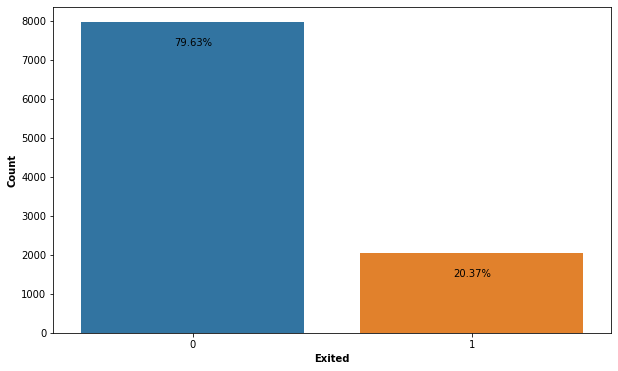

In [6]:

# Due to the binary nature of the dependent(output) parameter (Exited:0/1), the countplot is 
# employed to observe whether or not the data samples are balanced with respect to the target feature entries.
# As expected, the majority of the customers have not exited the bank (79.63%). 
plt.figure(figsize=(10,6))
total = len(data['Exited'])
count_entries=sns.countplot(x='Exited',data=data)
plt.xlabel('Exited',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
for p in count_entries.patches:
    count_entries.annotate('{:.2f}%'.format(100*p.get_height()/total), (p.get_x() + p.get_width() / 2., p.get_height()), 
                               ha = 'center', va = 'center', xytext = (0, -20), textcoords = 'offset points')

In [7]:
# Defining the ML models inputs-output 
X=data.drop('Exited',axis=1)
y=data['Exited']

In [8]:
# Splitting the dataset into train and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=0)

In [9]:
# Use of pipeline to transform the input features that contain numerical and categorical entries
# MinMaxScaler --> features with numerical/continuous entries
# OneHotEncoder --> categorical features
num_trnsfrm = Pipeline(steps=[('M-Scaler', MinMaxScaler())])
cat_trnsfrm = Pipeline(steps=[('OneHot_Enc', OneHotEncoder(drop='first'))])

In [10]:
# Grouping the input features based on their data type
num_feats =X_train.select_dtypes(include=['int64', 'float64']).columns
cat_feats = X_train.select_dtypes(include=['object']).columns
col_trnsfrm = ColumnTransformer(transformers=[('numerical', num_trnsfrm, num_feats),
        ('categorical', cat_trnsfrm, cat_feats)])

In [11]:
# Randomized Search to determine the optimal KNN hyperparameter values 
KNN_opt_params= { 
    'KNNclassifier__n_neighbors' : np.arange( 2, 21, 1 ),   
    'KNNclassifier__weights' : ['uniform','distance'],
    'KNNclassifier__algorithm' : ['ball_tree', 'kd_tree', 'brute'],
    'KNNclassifier__leaf_size' : np.arange( 5, 205, 5 ),
    'KNNclassifier__metric' : ['euclidean','chebyshev','minkowski'],
    'KNNclassifier__p' : [1,2] 
    }

# Randomized Search to determine the optimal SVC hyperparameter values 
SVC_opt_params= { 
    'SVCclassifier__C':            np.arange( 1, 51, 1 ),
    'SVCclassifier__kernel':       ['rbf','sigmoid'],                   
    'SVCclassifier__degree':       np.arange( 0, 51, 1 ),
    'SVCclassifier__gamma':        np.arange( 0, 3.1, 0.1 ),
    'SVCclassifier__coef0':        np.arange( 0, 3.1, 0.1 )
    }

# Randomized Search to determine the optimal Random Forest hyperparameter values 
RF_opt_params= { 
    'RFclassifier__n_estimators': np.arange(100,200,10),
    'RFclassifier__max_depth' : np.arange(2,11,1),
    'RFclassifier__max_features': ['sqrt', 'log2'],
    'RFclassifier__class_weight' :['balanced','balanced_subsample'],
    'RFclassifier__criterion' :['gini', 'entropy']
    } 

In [12]:
# Use of make_scorer() to select the 'f1_score' as the scoring 
# metric of the RandomizedSearchCV()
def clf_f1_score(y_true,y_pred,score):
    
    clf_score=score(y_true, y_pred,average='binary',pos_label=1)
    return clf_score
scoring = make_scorer(clf_f1_score, score = f1_score)

clfs_params = {
    'KNNclassifier': KNeighborsClassifier(),
    'SVCclassifier': SVC(),
    'RFclassifier': RandomForestClassifier()
    }
# Function that uses Pipeline & RandomizedSearchCV to fit the models # to the training set - Best classifier based on the f1_score
def select_best_model():
    i=0
    opt_param=[KNN_opt_params,SVC_opt_params,RF_opt_params]
    for key,val in clfs_params.items():
        
        clf= Pipeline(steps=[('col_trnsfrm',col_trnsfrm),(key,val)])
        clf_rand_search = RandomizedSearchCV(clf, opt_param[i], n_jobs=-1,cv=5,scoring=scoring )
        clf_rand_search.fit(X_train, y_train)  
        print('Best {} parameters:'.format(key))
        print(clf_rand_search.best_params_)
        
        print('Best {} score: ---> {}'.format(key,clf_rand_search.best_score_))
        
        best_score=0
        
        if  clf_rand_search.best_score_> best_score:
            best_score=clf_rand_search.best_score_
            best_model=clf_rand_search.best_estimator_
        i+=1
    print('-----------------------------------------------------')
     
    print("Best Classifier:\n{} ".format(best_model))
    print("Best Score: ---> {} ".format(best_score))
    return best_model,best_score
# Saving the best_model(estimator) and best score
result=select_best_model()
best_model,best_score=result[0],result[1]

Best KNNclassifier parameters:
{'KNNclassifier__weights': 'distance', 'KNNclassifier__p': 1, 'KNNclassifier__n_neighbors': 5, 'KNNclassifier__metric': 'euclidean', 'KNNclassifier__leaf_size': 170, 'KNNclassifier__algorithm': 'brute'}
Best KNNclassifier score: ---> 0.4114109928314139
Best SVCclassifier parameters:
{'SVCclassifier__kernel': 'rbf', 'SVCclassifier__gamma': 1.0, 'SVCclassifier__degree': 44, 'SVCclassifier__coef0': 0.30000000000000004, 'SVCclassifier__C': 13}
Best SVCclassifier score: ---> 0.5345845963692072
Best RFclassifier parameters:
{'RFclassifier__n_estimators': 190, 'RFclassifier__max_features': 'log2', 'RFclassifier__max_depth': 10, 'RFclassifier__criterion': 'gini', 'RFclassifier__class_weight': 'balanced_subsample'}
Best RFclassifier score: ---> 0.6156698527104241
-----------------------------------------------------
Best Classifier:
Pipeline(steps=[('col_trnsfrm',
                 ColumnTransformer(transformers=[('numerical',
                                      

In [14]:
# Saving and loading the best model
import joblib
joblib.dump(best_model, './best_model.pkl')
load_model = joblib.load('C:\\Users\\gt\\Desktop\\transformers_pipelines\\best_model.pkl')
best_clf_pipe=load_model

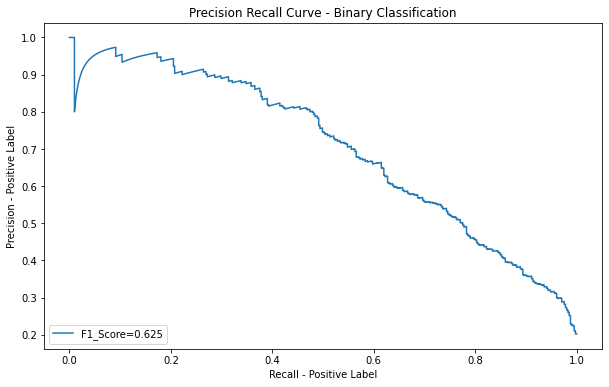

In [87]:
# Predicting the probability
y_prob=best_clf_pipe.predict_proba(X_test)
# Predicting the class
y_pred=best_clf_pipe.predict(X_test)

# Plotting the precision-recall curve
precision,recall,thresholds = precision_recall_curve(y_test,y_prob[:,1])
plt.figure(figsize=(10,6))
plt.plot(recall,precision,label='F1_Score={0:0.3f}'.format(f1_score(y_test, y_pred,average='binary',pos_label=1)))

plt.xlabel('Recall - Positive Label')
plt.ylabel('Precision - Positive Label')
plt.title('Precision Recall Curve - Binary Classification')
plt.legend(loc='lower left')
plt.show()

In [16]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89      1595
           1       0.57      0.70      0.63       405

    accuracy                           0.83      2000
   macro avg       0.74      0.78      0.76      2000
weighted avg       0.85      0.83      0.84      2000



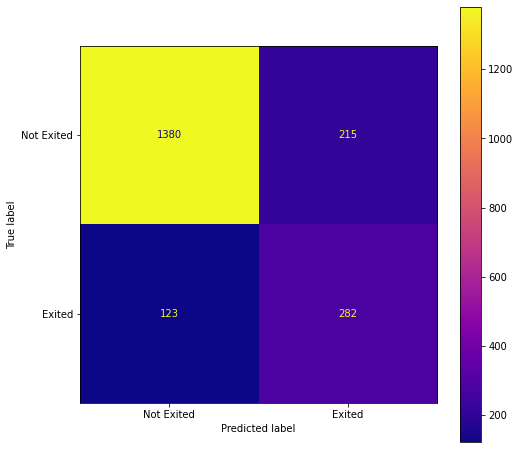

In [17]:
# Confusion Matrix
fig, axs = plt.subplots(figsize=(8,8))
plot_confusion_matrix(best_clf_pipe,X_test,y_test,values_format='d',
                      display_labels=['Not Exited','Exited'],cmap='plasma',ax=axs);